# Import libraries:

In [1]:
import pandas as pd
import numpy as np
import random as random
import matplotlib.pyplot as plt

# Get inputs:

In [2]:
min_v = float(input("Enter the minimum value (min_v) you want to achieve: "))
max_w = float(input("Enter the maximum weight (max_w) allowed: "))

min_n = int(input("Enter the minimum number of snack types (min_n): "))
max_n = int(input("Enter the maximum number of snack types (max_n): "))

Enter the minimum value (min_v) you want to achieve:  22
Enter the maximum weight (max_w) allowed:  10
Enter the minimum number of snack types (min_n):  3
Enter the maximum number of snack types (max_n):  4


In [3]:
population_size = int(input("Enter population size: "))

Enter population size:  100


In [4]:
max_run = int(input())

 1000


In [5]:
print(f"min value: {min_v},\nmax weight: {max_w},\nrange: {min_n}-{max_n},\npopulation size: {population_size},\nmax run: {max_run}")

min value: 22.0,
max weight: 10.0,
range: 3-4,
population size: 100,
max run: 1000


# read CSV file and save to Data Frame:

In [6]:
file_path = 'snacks.csv'
df = pd.read_csv(file_path)

In [7]:
print(df)

            Snack  Available Weight  Value
0          MazMaz                10     10
1   Doogh-e-Abali                15     10
2            Nani                 5      5
3            Jooj                 7     15
4         Hot-Dog                20     15
5           Chips                 8      6
6        Nooshaba                12      8
7        Shokolat                 6      7
8       Chocoroll                 9     12
9         Cookies                11     11
10        Abnabat                 4      4
11   Adams-Khersi                14      9
12        Popcorn                16     13
13         Pastil                 3      7
14       Tordilla                10      9
15       Masghati                 5      6
16        Ghottab                 7     10
17   Saghe-Talaei                 9     11
18    Choob-Shoor                13     12


# Part One: Defining Basic Concepts

## Gene:

In [8]:
class Gene:
    def __init__(self, name, max_weight, value_per_weight, weight = 0):
        self.name = name
        self.max_weight = max_weight
        self.weight = weight
        self.value_per_weight = value_per_weight
        
    def __repr__(self):
        return f"Gene(name={self.name}, weight={self.weight}, max_weight={self.max_weight}, value_per_weight={self.value_per_weight}\n)"

    def __str__(self):
        return f"{self.name}: Weight={self.weight}, Value per Weight={self.value_per_weight}"


## Chromosome:

In [9]:
class Chromosome:
    def __init__(self, geness, new_born = False):
        self.genes_temp = geness
        self.genes = []
        for g in self.genes_temp:
            self.genes.append(Gene(g.name, g.max_weight, g.value_per_weight, g.weight))
        if (new_born == True):
            for gene in self.genes:
                gene.weight = random.uniform(0, gene.max_weight)
        self.genes.sort(key=lambda x: x.name)
        self.total_weight = sum(gene.weight for gene in self.genes)
        self.total_value = sum(gene.weight * gene.value_per_weight for gene in self.genes)
        self.variety_of_snacks = len(self.genes)
        self.fitness = 0 
         
    
    def __repr__(self):
        return f"\nChromosome(genes=\n{self.genes}, fitness={self.fitness}) \nTotal Weight: {self.total_weight}\nTotal Value: { self.total_value}\nRange: {self.variety_of_snacks}\n{"---"*25} \n"
        
    def __str__(self):
        genes_str = '\n'.join(str(gene) for gene in self.genes)
        return f"\nChromosome Details:\nGenes:\n{genes_str}\nFitness: {self.fitness} \nTotal Weight: {self.total_weight}\nTotal Value: { self.total_value}\nRange: {self.variety_of_snacks}\n{"---"*25} \n"
        



## Genes pool:

In [10]:

genes_pool = df.copy()
genes_pool.rename(columns={'Snack': 'Name'}, inplace=True)
genes_pool.rename(columns={'Available Weight': 'Maximum Weight'}, inplace=True)
genes_pool['Value per Weight'] = genes_pool['Value'] / genes_pool['Maximum Weight']
genes_pool = genes_pool[['Name', 'Maximum Weight', 'Value per Weight']]

gene_objects = [Gene(row['Name'], row['Maximum Weight'], row['Value per Weight']) for index, row in genes_pool.iterrows()]


In [11]:
print(genes_pool)

             Name  Maximum Weight  Value per Weight
0          MazMaz              10          1.000000
1   Doogh-e-Abali              15          0.666667
2            Nani               5          1.000000
3            Jooj               7          2.142857
4         Hot-Dog              20          0.750000
5           Chips               8          0.750000
6        Nooshaba              12          0.666667
7        Shokolat               6          1.166667
8       Chocoroll               9          1.333333
9         Cookies              11          1.000000
10        Abnabat               4          1.000000
11   Adams-Khersi              14          0.642857
12        Popcorn              16          0.812500
13         Pastil               3          2.333333
14       Tordilla              10          0.900000
15       Masghati               5          1.200000
16        Ghottab               7          1.428571
17   Saghe-Talaei               9          1.222222
18    Choob-

In [12]:
print(gene_objects)

[Gene(name=MazMaz, weight=0, max_weight=10, value_per_weight=1.0
), Gene(name=Doogh-e-Abali, weight=0, max_weight=15, value_per_weight=0.6666666666666666
), Gene(name=Nani, weight=0, max_weight=5, value_per_weight=1.0
), Gene(name=Jooj, weight=0, max_weight=7, value_per_weight=2.142857142857143
), Gene(name=Hot-Dog, weight=0, max_weight=20, value_per_weight=0.75
), Gene(name=Chips, weight=0, max_weight=8, value_per_weight=0.75
), Gene(name=Nooshaba, weight=0, max_weight=12, value_per_weight=0.6666666666666666
), Gene(name=Shokolat, weight=0, max_weight=6, value_per_weight=1.1666666666666667
), Gene(name=Chocoroll, weight=0, max_weight=9, value_per_weight=1.3333333333333333
), Gene(name=Cookies, weight=0, max_weight=11, value_per_weight=1.0
), Gene(name=Abnabat, weight=0, max_weight=4, value_per_weight=1.0
), Gene(name=Adams-Khersi, weight=0, max_weight=14, value_per_weight=0.6428571428571429
), Gene(name=Popcorn, weight=0, max_weight=16, value_per_weight=0.8125
), Gene(name=Pastil, wei

# Part Two: Primary population production

In [13]:
initial_population = []
for _ in range(population_size):
    x = random.randint(min_n, max_n)
    genes_temp = random.sample(gene_objects, x)
    c = Chromosome(genes_temp, True)
    initial_population.append(c)
    c = None


In [14]:
print(initial_population)

[
Chromosome(genes=
[Gene(name=Choob-Shoor, weight=10.24924258851404, max_weight=13, value_per_weight=0.9230769230769231
), Gene(name=Jooj, weight=6.321032487518339, max_weight=7, value_per_weight=2.142857142857143
), Gene(name=Nooshaba, weight=6.252515487588438, max_weight=12, value_per_weight=0.6666666666666666
), Gene(name=Pastil, weight=1.374112221154757, max_weight=3, value_per_weight=2.3333333333333335
)], fitness=0) 
Total Weight: 24.196902784775574
Total Value: 30.38051443633862
Range: 4
--------------------------------------------------------------------------- 
, 
Chromosome(genes=
[Gene(name=Choob-Shoor, weight=6.5006040296854515, max_weight=13, value_per_weight=0.9230769230769231
), Gene(name=Ghottab, weight=6.6818544873032595, max_weight=7, value_per_weight=1.4285714285714286
), Gene(name=Nani, weight=1.6556403386068497, max_weight=5, value_per_weight=1.0
)], fitness=0) 
Total Weight: 14.838098855595561
Total Value: 17.201704314903573
Range: 3
-----------------------------

# Part three: Implementation and specification of compatibility criterion function

## fitness

In [15]:
def calculate_fitness(chromosome):
    fitness = chromosome.total_value
    penalty_weight =max_w - chromosome.total_weight
    #penalty_value = chromosome.total_value - min_v
    penalties = 0
    if penalty_weight < 0:
        penalties = penalty_weight 
    #if penalty_value < 0:
    #    penalties = penalties + penalty_value 
    if penalties < 0 :
        fitness = penalties
    return fitness
    


#### Update Chromosomes Fitness'

In [16]:
def update_fitness(population):
    for chromosome in population:
        chromosome.fitness = calculate_fitness(chromosome)
    return population
    

In [17]:
initial_population = update_fitness(initial_population)

## Population compatibility:

In [18]:
def print_population_compatibility(population):
    print("Population compatibility:")
    print(f"Avg Fitness: {sum(c.fitness for c in population) / len(population)}")
    print(f"Max Fitness: {max(c.fitness for c in population)}")
    print(f"Avg Value per Weight: {sum(c.total_value / c.total_weight for c in population) / len(population)}")
    print(f"Max Avg Value per Weight: {max(c.total_value / c.total_weight for c in population)}")
    print("--" * 25)

In [19]:
print_population_compatibility(initial_population)

Population compatibility:
Avg Fitness: -6.185526908167449
Max Fitness: 11.222029134353507
Avg Value per Weight: 1.0128958114756805
Max Avg Value per Weight: 2.01908872784135
--------------------------------------------------


## find winner

In [20]:
def find_winner(population):
    max_fitness = float('-inf')
    winner = population[0];
    for chromosome in population:
        if (chromosome.fitness > max_fitness):
            max_fitness = chromosome.fitness
            winner = chromosome
    return winner

In [21]:
def check_for_answer(population):
    winner = find_winner(population)
    if winner.fitness >= min_v:
        return winner
    return None

In [22]:
def print_winner(winner):
    for Gene in winner.genes:
        print(f"{Gene.name}: {Gene.weight}")
    print(f"Total Weight: {winner.total_weight}")
    print(f"Total Value: {winner.total_value}")

# Part four: Generating a new generation

## Crossover:

#### Probability:

In [23]:
prop_c = 0.3
def decide_with_probability(p, thing1, thing2):
    if random.random() < p:
        return thing1
    else:
        return thing2

#### Crossover Function:

In [24]:
def crossover(prob , parent1, parent2, min_n, max_n):
    x = min(len(parent1.genes), len(parent2.genes))
    if x <= 1:
        return [parent1, parent2]
    if parent1 == parent2:
        return [parent1, parent2]
        
    child1 = Chromosome(parent1.genes, False);
    child2 = Chromosome(parent2.genes, False);

    possible1 = [g for g in child1.genes if g.name not in [k.name for k in child2.genes]]
    possible2 = [g for g in child2.genes if g.name not in [k.name for k in child1.genes]]
    if min(len(possible1), len(possible2)) >= 1 :
        i = random.randint(0, min(len(possible1), len(possible2)) - 1)
        child1.genes.remove(possible1[i])
        child2.genes.remove(possible2[i])
        child1.genes.append(possible2[i])
        child2.genes.append(possible1[i])

    def select_new_generation(prob, child1, child2, parent1, parent2):
        if (max_w - child1.total_weight - child2.total_weight > max_w - parent1.total_weight - parent2.total_weight):    
            return decide_with_probability(prob,  [parent1, parent2],  [child1, child2])            
        return decide_with_probability(prob, [child1, child2], [parent1, parent2])

    return select_new_generation(prob, child1, child2, parent1, parent2)
    

def generate_new_population_crossover(prob, population):
    np.random.shuffle(population)
    new_population = []
    for i  in range(0, round((population_size)/2)):
        parent1 = population[i]
        parent2 = population[-i]
        new_generation = crossover(prob , parent1, parent2, min_n, max_n)
        new_population.append(new_generation[0])
        new_population.append(new_generation[1])
    return new_population




## Mutation:

In [25]:
def mutation(prob_m, population):
    np.random.shuffle(population)
    new_population = []
    for i  in range(0, population_size - 1):
        parent = population[i]
        genes = []
        for g in parent.genes:
            genes.append(g)

        genes.sort(key=lambda x: x.value_per_weight)

        pre_gene = genes.pop(0)

        sorted_genes = gene_objects
        sorted_genes.sort(key=lambda x: x.value_per_weight, reverse=True)

        new_gene = pre_gene

        flag1 = False 
        flag2 = True
        for g in sorted_genes:
            if pre_gene.name == g.name:    
                if pre_gene.weight == pre_gene.max_weight:
                    break
            if any(x.name == g.name for x in genes) == True:
                continue
            else:
                new_gene = g
                break

        if parent.variety_of_snacks > min_n:
            flag1 = True 
        if pre_gene.weight == pre_gene.max_weight: 
            flag2 = True 
        if flag1:
            if random.random() > 0.1:
                genes.append(new_gene)
            else:
                if len(genes) < min_n:
                     genes.append(new_gene)
        else: 
            genes.append(new_gene)
            
        if flag2:
            not_in_parent = [obj for obj in sorted_genes if obj.name not in [objj.name for objj in parent.genes]]
            if random.random() > 0.9 and len(not_in_parent) != 0:
                new_new = random.choice(not_in_parent)
                new_new.weight = random.uniform(0, new_new.max_weight)
                if any(x.name == new_new.name for x in genes) == False and len(genes) < max_n:
                    genes.append(new_new)
                
        if len(genes) == 0:
            return population

        for g in genes:
            if g.name == new_gene.name:
                g.weight = random.uniform(min(g.max_weight, pre_gene.weight), new_gene.max_weight)
                break
     
        child = Chromosome(genes, False)
        #print(f"parent: {parent}")
        #print (f"child: {child}")
        #print("__" * 10)

        genes.clear()
        
        new_generation = decide_with_probability(prob_m, parent, child)
        new_population.append(new_generation)
    return new_population

# Part five: Creating a Genetic Algorithm on the Problem

## Algorithm:

In [26]:
population = initial_population

winner = check_for_answer(initial_population)
counter = 0
cur_fit = sum(c.fitness for c in population) / len(population)
value_per_weight = sum(c.total_value / c.total_weight for c in population) / len(population)

fitness_arr = []
val_weight_arr = []
max_fitness_arr = []
max_val_weight_arr = []

while winner == None and counter < max_run:
    fitness_arr.append(cur_fit)
    val_weight_arr.append(value_per_weight)   
    max_fitness_arr.append(max(c.fitness for c in population))
    max_val_weight_arr.append(max(c.total_value / c.total_weight for c in population)) 
    counter = counter + 1
    prob_m = min (1 / (counter + 1), 2/max_run)
    new_population = population
    new_population = generate_new_population_crossover(prop_c, population)
    new_population = mutation(prob_m, new_population)
    population = update_fitness(new_population)
    cur_fit = sum(c.fitness for c in population)/ len(population)
    value_per_weight = sum(c.total_value / c.total_weight for c in population) / len(population)
    winner =check_for_answer(population)
fitness_arr.append(cur_fit)
val_weight_arr.append(value_per_weight)   
max_fitness_arr.append(max(c.fitness for c in population))
max_val_weight_arr.append(max(c.total_value / c.total_weight for c in population))      
if winner != None:
    print("OK")
else:
    print("fail")

fail


# Part six: Evaluation of Results

In [27]:
if winner != None:
    print_winner(winner)
else: 
    print("No answer found:\n")
    
    print("The best possible answer: ")
    print(find_winner(population))

No answer found:

The best possible answer: 

Chromosome Details:
Genes:
Ghottab: Weight=7.0, Value per Weight=1.4285714285714286
Jooj: Weight=0.08082598102021388, Value per Weight=2.142857142857143
Pastil: Weight=3.0, Value per Weight=2.3333333333333335
Fitness: -0.08082598102021343 
Total Weight: 10.080825981020213
Total Value: 17.173198530757602
Range: 3
--------------------------------------------------------------------------- 



In [28]:
def print_details(val_weight_arr, fitness_arr, max_val_weight_arr, max_fitness_arr):
    for i in range(1, len(fitness_arr)):
        print(f"i: {i}")
        print(f"avg fitness: {fitness_arr[i]}")
        print(f"max fitness: {max_fitness_arr[i]}")
        print(f"avg value per weight: {val_weight_arr[i]}")
        print(f"max value per weight: {max_val_weight_arr[i]}")
        print("_" * 50)

In [29]:
def plot_detail(y, title, axes, i):
    x = [i for i in range(0, len(y))]
    axes[i].set_title(title)
    axes[i].plot(x,y)

def plot_details(val_weight_arr, fitness_arr, max_val_weight_arr, max_fitness_arr):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    plot_detail(fitness_arr, "Avg Fitness", axes, 0)
    plot_detail(val_weight_arr, "Avg Value Per Weight", axes, 1)
    fig.tight_layout()
    plt.show()
    fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    plot_detail(max_fitness_arr, "Max Fitness", axes2, 0)
    plot_detail(max_val_weight_arr, "Max Value Per Weight", axes2, 1)
    fig2.tight_layout()
    plt.show()

#run = 1000


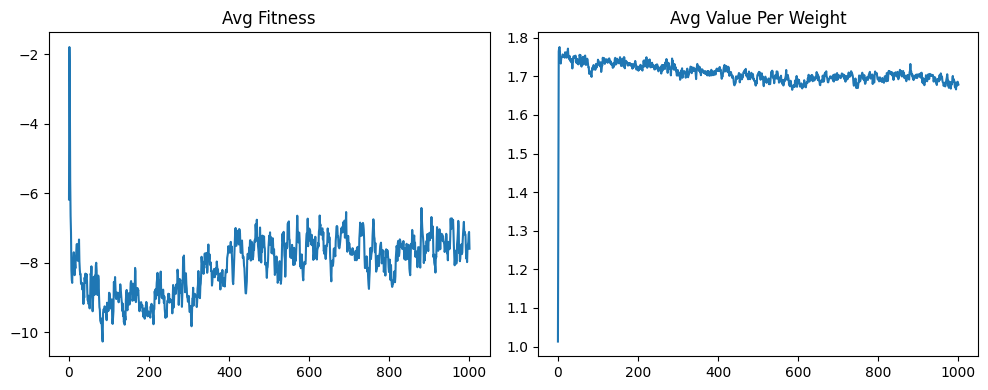

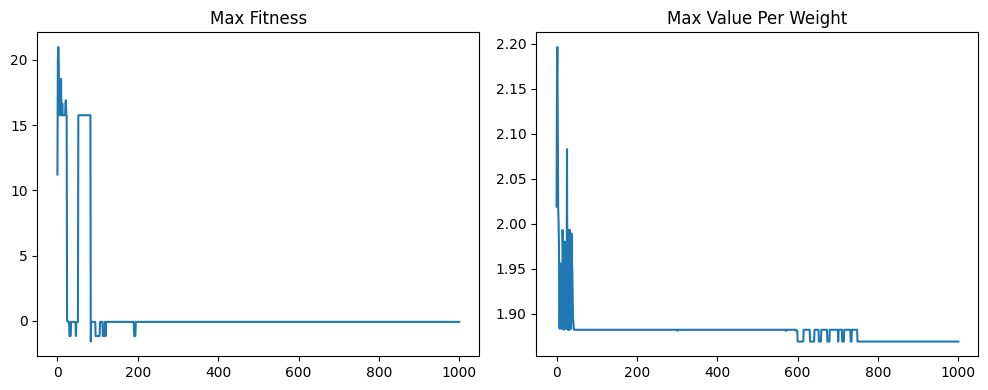

In [30]:
print(f"#run = {counter}")
plot_details(val_weight_arr, fitness_arr, max_val_weight_arr, max_fitness_arr)


In [31]:
print_population_compatibility(population)

Population compatibility:
Avg Fitness: -7.60331758783381
Max Fitness: -0.08082598102021343
Avg Value per Weight: 1.678886316213394
Max Avg Value per Weight: 1.8692808103513157
--------------------------------------------------


In [32]:
print_details(val_weight_arr, fitness_arr,  max_val_weight_arr, max_fitness_arr)

i: 1
avg fitness: -1.8002027338532463
max fitness: 19.968855777829443
avg value per weight: 1.4011319853253072
max value per weight: 2.1600019351659405
__________________________________________________
i: 2
avg fitness: -2.810059079685431
max fitness: 20.991087889204053
avg value per weight: 1.7646575289909037
max value per weight: 2.1963131956297803
__________________________________________________
i: 3
avg fitness: -5.640022257445465
max fitness: 20.46917767270919
avg value per weight: 1.7730676172393474
max value per weight: 2.0993513559690746
__________________________________________________
i: 4
avg fitness: -6.658193455957592
max fitness: 17.64058653581617
avg value per weight: 1.7758815371065075
max value per weight: 2.0178322821897123
__________________________________________________
i: 5
avg fitness: -7.133329573431416
max fitness: 17.644834706185634
avg value per weight: 1.7656636096235947
max value per weight: 2.0020027582651405
__________________________________________

In [33]:
population


[
 Chromosome(genes=
 [Gene(name=Chocoroll, weight=8.999328368643502, max_weight=9, value_per_weight=1.3333333333333333
 ), Gene(name=Ghottab, weight=7.0, max_weight=7, value_per_weight=1.4285714285714286
 ), Gene(name=Jooj, weight=0.08082598102021388, max_weight=7, value_per_weight=2.142857142857143
 ), Gene(name=Pastil, weight=3.0, max_weight=3, value_per_weight=2.3333333333333335
 )], fitness=-9.080154349663715) 
 Total Weight: 19.080154349663715
 Total Value: 29.17230302228227
 Range: 4
 --------------------------------------------------------------------------- ,
 
 Chromosome(genes=
 [Gene(name=Ghottab, weight=7.0, max_weight=7, value_per_weight=1.4285714285714286
 ), Gene(name=Jooj, weight=0.08082598102021388, max_weight=7, value_per_weight=2.142857142857143
 ), Gene(name=Pastil, weight=3.0, max_weight=3, value_per_weight=2.3333333333333335
 )], fitness=-0.08082598102021343) 
 Total Weight: 10.080825981020213
 Total Value: 17.173198530757602
 Range: 3
 --------------------------